In [19]:
import os
import gc
import numpy as np
import pandas as pd
import matplotlib as plt
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']
path = 'data/Pixiv'  # 数据根目录


def get_data_per_interval(interval='M'):
    temp = base_data.set_index('date')  # 列转行
    temp.index = pd.to_datetime(temp.index)
    return temp.resample(interval).size()  # 重新分组


def output_image(indexes, interval='M', save=False, **kwargs):
    temp = None
    sum_data = get_data_per_interval(interval)
    for index in indexes:
        x = merge_data[merge_data['tags'] == index]
        x.set_index('date', inplace=True)
        x.index = pd.to_datetime(x.index)
        temp = x.resample(interval).size().div(sum_data).plot(legend=True, label=index, **kwargs)
        # temp = x.resample(interval).size().div(sum_data).plot(**kwargs)
    if save is True:
        fig = temp.get_figure()
        if not os.path.isdir('data_img'):
            os.makedirs('data_img')
        fig.savefig('data_img/pixiv_daily_rank_2.png')

In [3]:
base_data = pd.read_csv(os.path.join(path, 'pixiv_daily_rank_base.csv'))

In [4]:
tag_data = pd.read_csv(os.path.join(path, 'pixiv_daily_rank_tag.csv'))

In [5]:
merge_data = pd.merge(base_data, tag_data, on='illust_id')

In [6]:
gc.collect()

7

In [7]:
merge_data['tags'].value_counts()[:20].index[0]

'オリジナル'

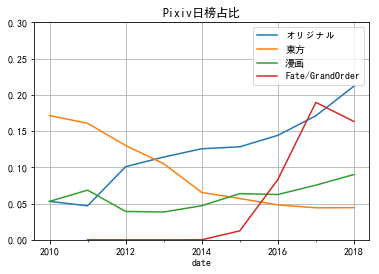

In [20]:
output_image(merge_data['tags'].value_counts()[:4].index, interval='Y', title='Pixiv日榜占比', grid=True, ylim=[0, 0.3])

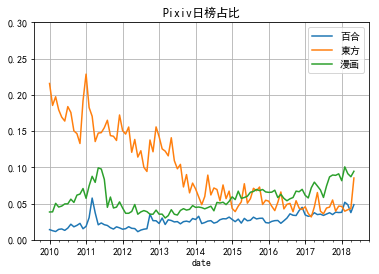

In [22]:
indexes = ['百合', '東方', '漫画']
output_image(indexes, interval='M', save=True, title='Pixiv日榜占比', grid=True, ylim=[0, 0.3])